In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Read the data

In [2]:
data = pd.read_csv('../datasets/pima_indians_diabetes.csv')

In [3]:
data.head(2)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Split the data

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X = data.iloc[:,:8]
y = data.iloc[:,8]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Classification

#### Build the model

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [10]:
estimators = []

In [11]:
m1 = LogisticRegression(max_iter=200)

In [12]:
estimators.append(('lreg',m1))

In [13]:
m2 = DecisionTreeClassifier(max_depth=8,random_state=42)

In [14]:
estimators.append(('dec',m2))

In [15]:
m3 = SVC()

In [16]:
estimators.append(('svm',m3))

In [17]:
model = VotingClassifier(estimators=estimators)

In [18]:
model.fit(X_train,y_train)

VotingClassifier(estimators=[('lreg', LogisticRegression(max_iter=200)),
                             ('dec',
                              DecisionTreeClassifier(max_depth=8,
                                                     random_state=42)),
                             ('svm', SVC())])

#### Make predictions for training data and calculate the metrics

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_auc_score, roc_curve

In [20]:
yhat_train = model.predict(X_train)

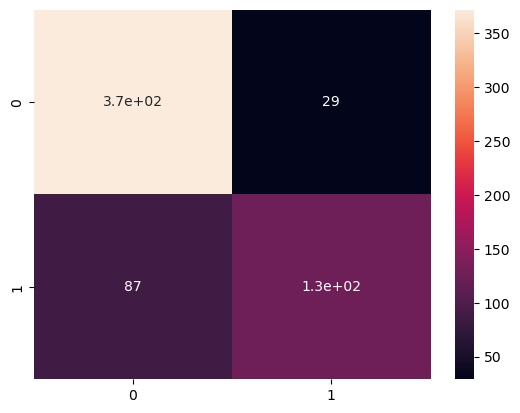

In [21]:
cm = confusion_matrix(y_train, yhat_train)
sns.heatmap(cm, annot=True)
plt.show()

In [22]:
cm

array([[372,  29],
       [ 87, 126]], dtype=int64)

In [23]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       401
           1       0.81      0.59      0.68       213

    accuracy                           0.81       614
   macro avg       0.81      0.76      0.77       614
weighted avg       0.81      0.81      0.80       614



#### Make predictions for testing data and calculate the metrics

In [24]:
yhat_test = model.predict(X_test)

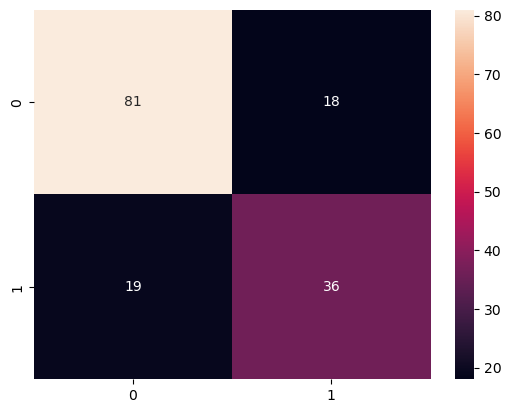

In [25]:
cm = confusion_matrix(y_test, yhat_test)
sns.heatmap(cm, annot=True)
plt.show()

In [26]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



## Accuracy for Training Data is 81 % and that for Testing Data is 76 % for the model 
+ Model is acceptable